<a href="https://colab.research.google.com/github/Abeer-Rahman/Deep-Learning-With-Python/blob/main/Copy_of_chapter04_getting_started_with_neural_networks_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5) #10000 most frequently occuring words in training data




Training data and test data are lists of reviews

Each review is a list of word indices(encoding a seq of words:each word has been turned into an integer which means each integer means a specific word in a dictionary)The word having the most frequency in reviews have a word index of 1(may be)

train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

In [ ]:
print(type(train_data))
print(train_data.shape)
print(train_data.shape) #1D numpy_array with 25000 lists
print(train_data[0])
type(train_data[0])

<class 'numpy.ndarray'>
(25000,)
(25000,)
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


list

In [ ]:
train_labels[0]


1

In [ ]:
#We are dealing with top 10000 most frequent words,so no index will exceed 10000
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [ ]:
word_index = imdb.get_word_index() # word_index() is a dictionary that maps words to integers
#create the dictionary that reverses the mapping
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
print(reverse_word_index)

print(len(reverse_word_index))
#Decode the review in train_data[0] which is a list of int
#the list will access the reverse_word_index with the integer keys in train_data[0]
#in the imdb data set 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)
test=reverse_word_index.get(train_data[0][1]-3)
print(test)
test=reverse_word_index.get(1)
print(test)

### Preparing the data
We have to use contiguous data which ensures that texts or paragrpaghs remain intact in each batch

We can’t directly feed lists of integers into a neural network. They all have different lengths, but a neural network expects to process contiguous batches of data.

We have to turn our lists into tensors

We will use multi-hot encoding that will encode our list into a vector od 0s and 1s and then all will be of same dimension



**Encoding the integer sequences via multi-hot encoding**

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(type(x_train))
print(type(x_test))
print(x_train.shape)
print(x_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25000, 10000)
(25000, 10000)


In [ ]:
print(len(train_data[0]))
# print(len(train_data[0]))
# for i in train_data[0]:
#   if i==2:
#     break
# print(train_data[0].index(i))
# x_train[0][27]
print(len(x_train[0]))


218
10000


In [ ]:
print(type(train_labels))
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(25000,)


### Building your model

**Model definition**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:] #15000 samples
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 105ms/step - loss: 0.5256 - accuracy: 0.7739 - val_loss: 0.3984 - val_accuracy: 0.8634
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3246 - accuracy: 0.8957 - val_loss: 0.3134 - val_accuracy: 0.8856
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2460 - accuracy: 0.9163 - val_loss: 0.3008 - val_accuracy: 0.8770
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1975 - accuracy: 0.9349 - val_loss: 0.3013 - val_accuracy: 0.8779
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1632 - accuracy: 0.9468 - val_loss: 0.2795 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1365 - accuracy: 0.9572 - val_loss: 0.2811 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1179 - accuracy: 0.9643 - val_loss: 0.2914 - val_accuracy: 0.8861
Epoch 8/20
3

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

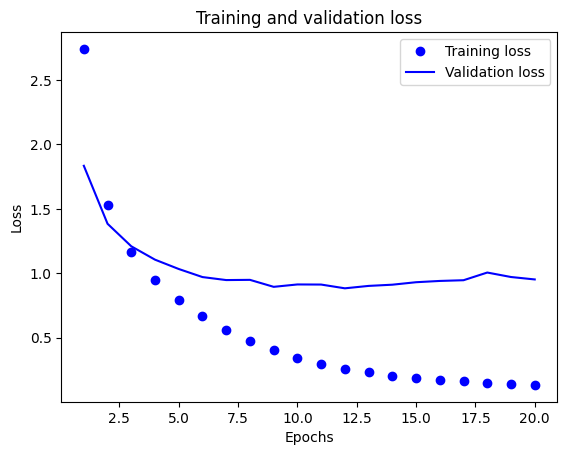

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

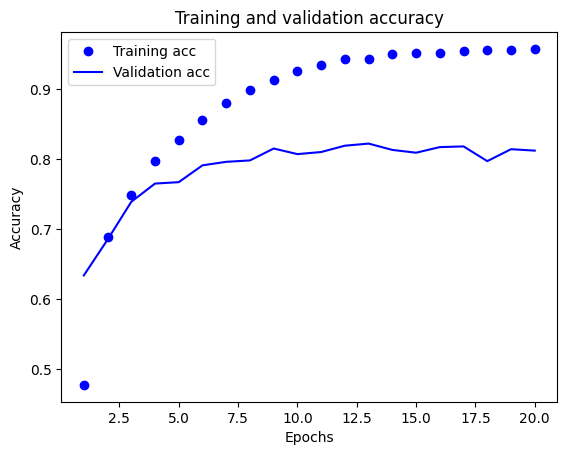

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

#During evaluation 782 batches were processed, so batch size is 25000/782=32(approx)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.4711 - accuracy: 0.8084
Epoch 2/4
49/49 [==============================] - 1s 24ms/step - loss: 0.2789 - accuracy: 0.9022
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2188 - accuracy: 0.9208
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.3003 - accuracy: 0.8784


In [ ]:
results

[0.3002670407295227, 0.8784000277519226]

### Using a trained model to generate predictions on new data

In [ ]:
predictions=model.predict(x_test)
predictions=list(predictions)
print(test_labels[0])

71/71 [==============================] - 0s 5ms/step
0


### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

We’ll build a model to classify Reuters newswires into 46 mutually exclusive topics. Because we have many classes, this problem is an instance of multiclass classification, and because each data point should be classified into only one category, the problem is more specifically an instance of single-label multiclass classification.

### The Reuters dataset

There are 46 topics where each topic has at least 10 examples in the training data set

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)
print(type(train_data))
print(train_data.shape)
print(train_data[0])
print(type(train_data[0]))
print(type(train_labels))
print(train_labels.shape)
print(train_labels[0])
print(type(train_labels[0]))
print(max(train_labels))



<class 'numpy.ndarray'>
(8982,)
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
<class 'list'>
<class 'numpy.ndarray'>
(8982,)
3
<class 'numpy.int64'>
45


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
train_labels[20]

11

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

There are two possibilities: you can cast the label list as an integer tensor, or we can use one-hot encoding. One-hot encoding is a widely used format for categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index.

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
print(y_train[20])
print(list(y_train[20]).index(1))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
11


In [ ]:
#built-in-way in keras
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

In a stack of Dense layers like those we’ve been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck. In the previous example, we used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax") #model will output a probability distribution over the 46 different output classes
])

**Compiling the model**

The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels.

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 2.7404 - accuracy: 0.4778 - val_loss: 1.8339 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.5325 - accuracy: 0.6894 - val_loss: 1.3842 - val_accuracy: 0.6850
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.1679 - accuracy: 0.7484 - val_loss: 1.2095 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.9505 - accuracy: 0.7969 - val_loss: 1.1057 - val_accuracy: 0.7650
Epoch 5/20
16/16 [==============================] - 1s 57ms/step - loss: 0.7962 - accuracy: 0.8267 - val_loss: 1.0334 - val_accuracy: 0.7670
Epoch 6/20
16/16 [==============================] - 1s 81ms/step - loss: 0.6666 - accuracy: 0.8561 - val_loss: 0.9708 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 1s 83ms/step - loss: 0.5614 - accuracy: 0.8804 - val_loss: 0.9475 - val_accuracy: 0.7960
Epoch 8/20
16

**Plotting the training and validation loss**

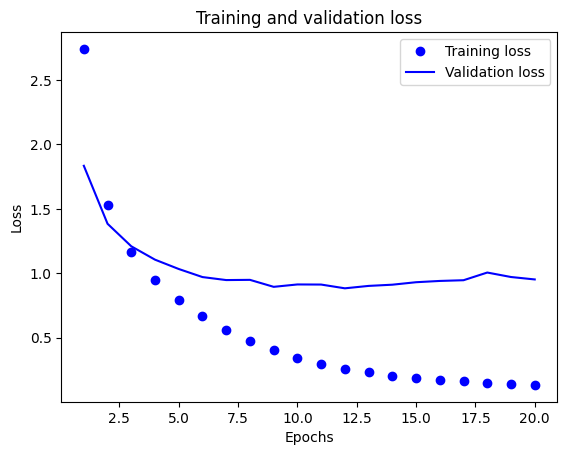

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

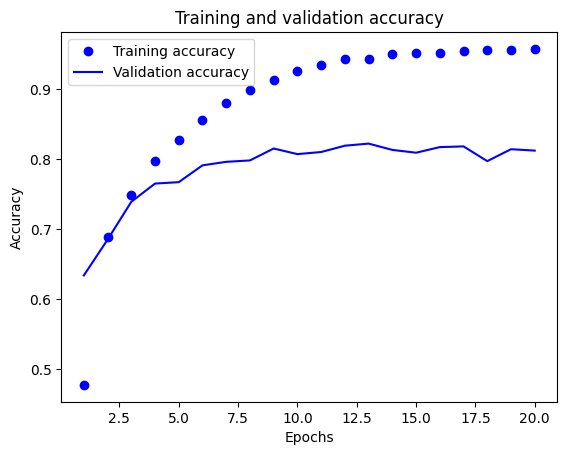

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 79ms/step - loss: 2.5457 - accuracy: 0.5232
Epoch 2/9
18/18 [==============================] - 1s 76ms/step - loss: 1.4553 - accuracy: 0.6850
Epoch 3/9
18/18 [==============================] - 1s 63ms/step - loss: 1.1227 - accuracy: 0.7526
Epoch 4/9
18/18 [==============================] - 1s 42ms/step - loss: 0.9172 - accuracy: 0.8038
Epoch 5/9
18/18 [==============================] - 1s 45ms/step - loss: 0.7602 - accuracy: 0.8360
Epoch 6/9
18/18 [==============================] - 1s 45ms/step - loss: 0.6296 - accuracy: 0.8676
Epoch 7/9
18/18 [==============================] - 1s 42ms/step - loss: 0.5246 - accuracy: 0.8901
Epoch 8/9
18/18 [==============================] - 1s 41ms/step - loss: 0.4382 - accuracy: 0.9055
Epoch 9/9
71/71 [==============================] - 0s 4ms/step - loss: 0.9119 - accuracy: 0.7943


In [ ]:
results

[0.9118843674659729, 0.7943009734153748]

With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case, we have 46 classes, and they may not be equally represented. What would be the accuracy of a random baseline? We could try quickly implementing one to check this empirically

In [ ]:
import copy
print(type(test_labels))
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

<class 'numpy.ndarray'>


0.1745325022261799

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

In [ ]:
np.sum(predictions[0])

In [ ]:
np.argmax(predictions[0])

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary